In [1]:
# Chpater 2 Main

In [2]:
import pandas as pd

housing = pd.read_csv("datasets/housing/housing.csv")

In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
housing["ocean_proximity"].value_counts(normalize=True)

ocean_proximity
<1H OCEAN     0.442636
INLAND        0.317393
NEAR OCEAN    0.128779
NEAR BAY      0.110950
ISLAND        0.000242
Name: proportion, dtype: float64

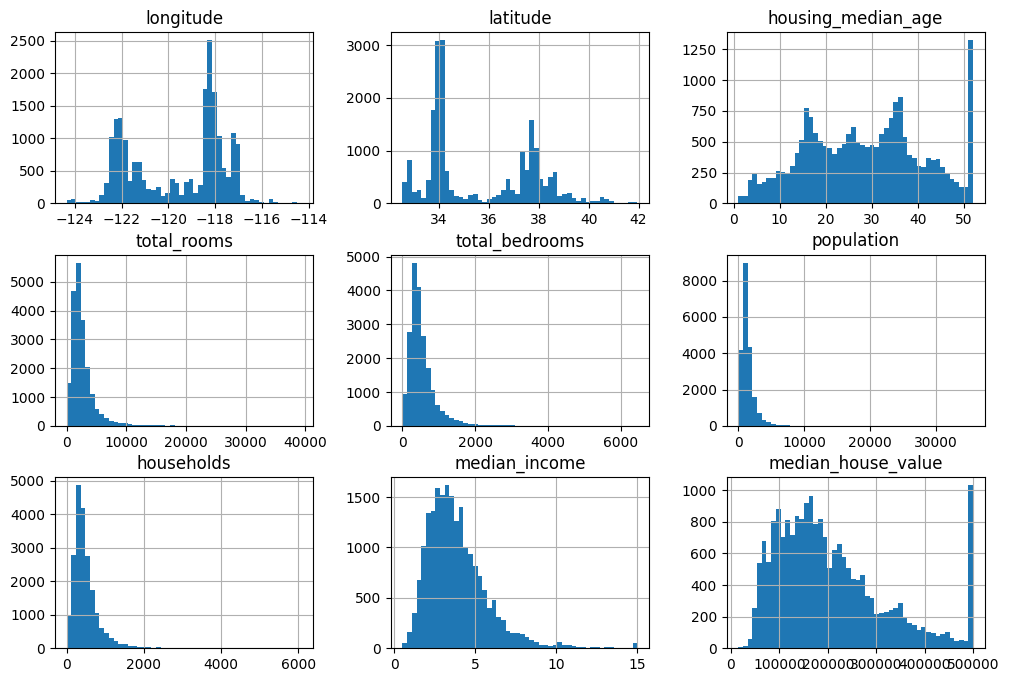

In [5]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(12,8))

plt.show()


In [6]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [8]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42, shuffle=True, stratify=housing["ocean_proximity"])

In [9]:
print(train_set["ocean_proximity"].value_counts())

ocean_proximity
<1H OCEAN     7309
INLAND        5241
NEAR OCEAN    2126
NEAR BAY      1832
ISLAND           4
Name: count, dtype: int64


Axes(0.125,0.11;0.775x0.77)


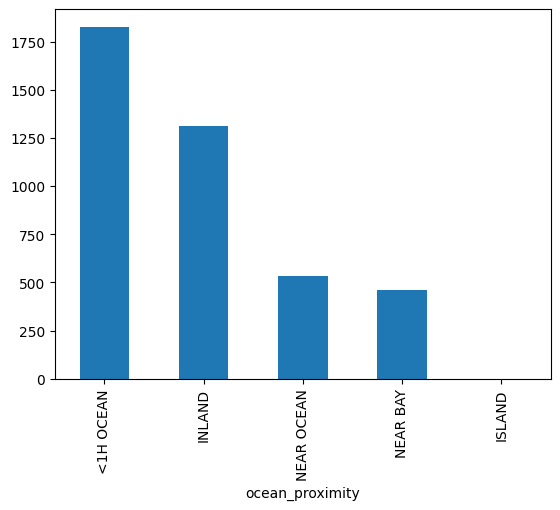

In [13]:
print(test_set["ocean_proximity"].value_counts().plot.bar())

In [24]:
# Day 2
import numpy as np
print("--")

housing["income_cat"] = pd.cut(housing["median_income"], bins=[0,1.5,3.0,4.5,6, np.inf], labels=[1,2,3,4,5])

--


In [31]:
housing["income_cat"].value_counts(normalize=True)

income_cat
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: proportion, dtype: float64

In [32]:
strat_train_set, strat_test_set = train_test_split(housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)

In [34]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [35]:
housing = strat_train_set.copy()

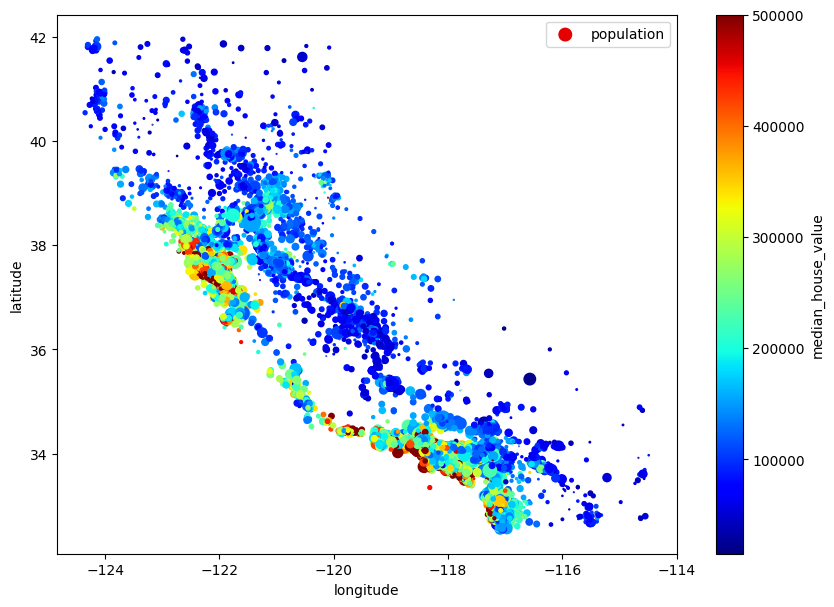

In [53]:
import seaborn as sns

housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, s=housing["population"] / 100, label="population", c="median_house_value", cmap="jet", colorbar=True, legend=True, sharex=False ,figsize=(10,7))
plt.grid()
plt.show()

In [60]:
# corr_matrix = housing.corr()

housing_numeric = housing.select_dtypes(exclude=["object"])

In [61]:
corr_matrix = housing_numeric.corr()

In [64]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

<Axes: >

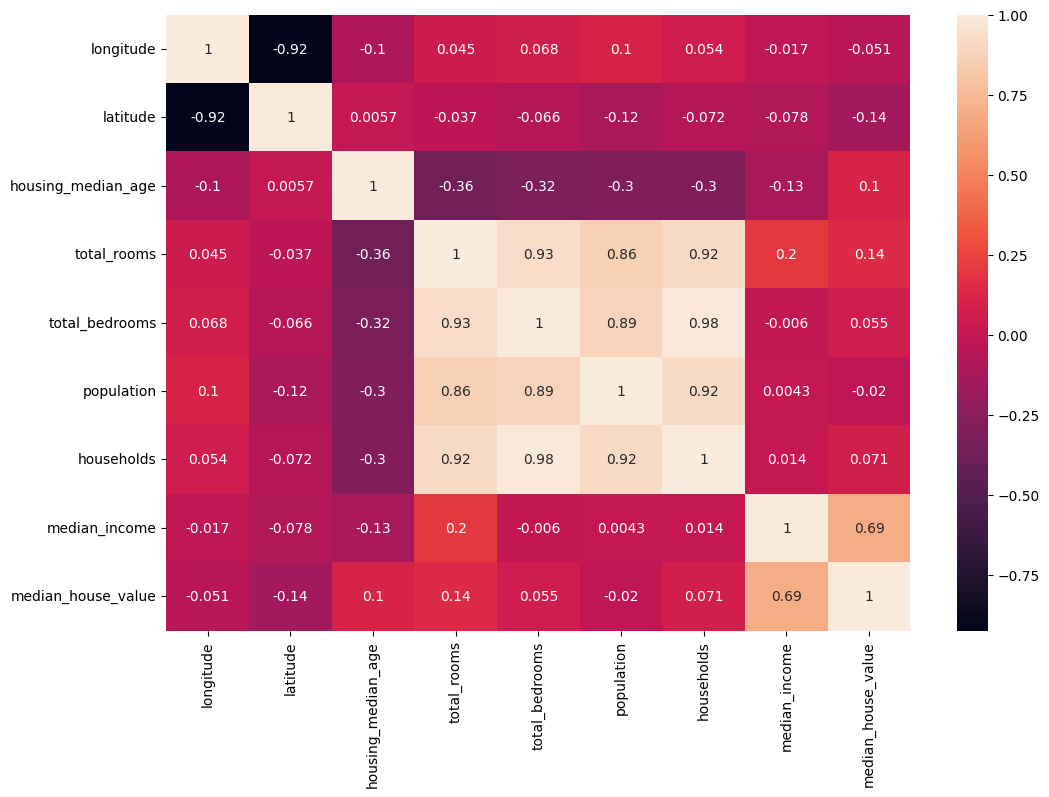

In [66]:
plt.figure(figsize=(12,8))

sns.heatmap(corr_matrix, annot=True)